In [ ]:
import matplotlib.pyplot as plt 
import matplotlib as mpl
import pandas as pd
from netCDF4 import Dataset
import collections
import numpy as np
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import re
from pathlib import Path
from scipy.interpolate import griddata
import xarray as xr
import pandas as pd
import glob
import geopandas as gpd 
import shapefile as shp 

In [2]:
fh_1 = xr.open_dataset("e5.oper.an.sfc.128_137_tcwv.ll025sc.2010010100_2010013123.nc",decode_cf=True)

In [12]:
files = glob.glob("ERA5 Hourly 2020\*.nc")
fh_arr = []
for file in files:
    fh_arr.append(xr.open_dataset(file,decode_cf=True)) 

In [13]:
fh_1 = fh_arr[1]

In [3]:

lons_1 = np.array(fh_1.variables['longitude'][:])
lats_1 = np.array(fh_1.variables['latitude'][:])
pwv_1 = np.array(fh_1.variables['TCWV'][:])
time_1 = np.array(fh_1.variables['time'][:])

i=0
monthly_data = []
while(i<744):
    pwv_slice = fh_1['TCWV'][i:i+24]
    monthly_data.append(np.array(pwv_slice))

    i+=24
monthly_data = np.array(monthly_data)

In [4]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [5]:
def fetch_pwv_details_monthly(lat,lon,start_day = 0,end_day = 30):
    
    lat_idx = find_nearest(lats_1,lat)
    lon_idx = find_nearest(lons_1,lon)
    
    pwv_data_pixel = monthly_data[start_day:end_day,:,lat_idx,lon_idx]
    pwv_data_pixel = np.array(pwv_data_pixel)
    
    return pwv_data_pixel

In [14]:
def plot_for_loc_monthly(name,lat,lon,start_day,end_day,):

    pwv_data_pixel = fetch_pwv_details_monthly(lat,lon,start_day,end_day+1)
    pwv_data_pixel = np.reshape(pwv_data_pixel,(end_day-start_day+1)*24)

    time = []
    for i in range(start_day,end_day+1):
        for j in range(24):
            time.append(i+j/24)
    time = np.array(time)
    print(time.shape)
    plt.plot(time,pwv_data_pixel,'--',color= 'red',label= "({x} N,{y} W):{Name}".format(x=round(lat,2),y =round(lon,2),Name = name))

(744,)


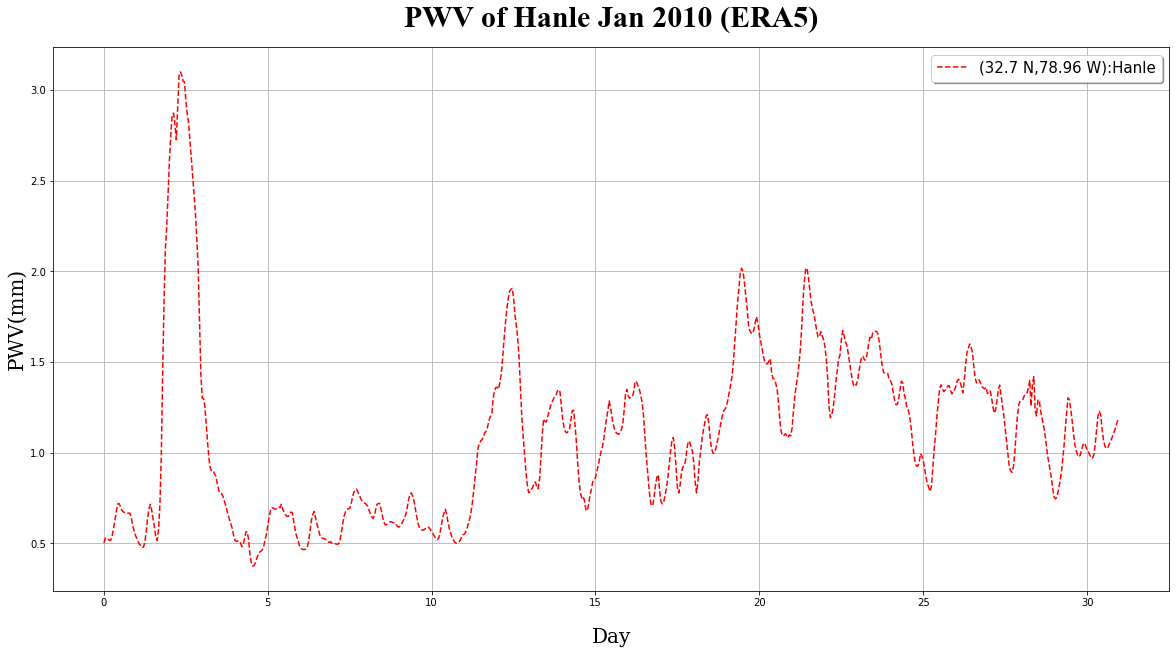

In [18]:
plt.figure(figsize = (20,10))
plt.grid(True)

plot_for_loc_monthly("Hanle",32.7,78.96,0,30)
plt.legend(loc = 'best',fontsize = 15,ncol=4,fancybox=True,shadow=True)
plt.xlabel("Day",size=20,font ='serif',labelpad=20)
plt.ylabel("PWV(mm)",size=20,font ='serif')

plt.title("PWV of Hanle Jan 2010 (ERA5)",size = 30,pad=20,font ='Times New Roman',fontweight='bold')
plt.savefig("Hanle_Jan_2010.jpeg",dpi=600)
plt.show()